# Tensorflow Network 1

---

### This is the first neural network I implement in tensor flow

- Tensorflow will be used
- Architecture I am aiming for is 100-50-20-10-5-1

In [7]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
current_dir = Path.cwd()
parent_dir = current_dir.parent.parent

from tensorflow.keras.regularizers import l2

### Importing the data

In [8]:
dev_data = pd.read_pickle(parent_dir/"Resources"/"FinalData"/"dev_data.pkl")
test_data = pd.read_pickle(parent_dir/"Resources"/"FinalData"/"test_data.pkl")
training_data = pd.read_pickle(parent_dir/"Resources"/"FinalData"/"training_data.pkl")
training_data.shape

(254696, 446)

In [9]:
training_data_x = training_data.drop(columns = ['Final Output'])
training_data_y = training_data['Final Output']
training_data_x = training_data_x.reset_index(['Over', 'Ball'])

dev_data_x = dev_data.drop(columns = ['Final Output'])
dev_data_y = dev_data['Final Output']
dev_data_x = dev_data_x.reset_index(['Over', 'Ball'])

C:\Users\HOME\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [10]:
print(training_data_x.shape)
print(training_data_y.shape)
print(dev_data_x.shape)
print(dev_data_y.shape)

(254696, 447)
(254696, 1)
(23552, 447)
(23552, 1)


In [11]:
train_x = training_data_x.to_numpy().T
train_y = training_data_y.to_numpy().T
dev_x = dev_data_x.to_numpy().T
dev_y = dev_data_y.to_numpy().T
print(train_x.shape)
print(train_y.shape)
print(dev_x.shape)
print(dev_y.shape)

(447, 254696)
(1, 254696)
(447, 23552)
(1, 23552)


In [27]:
train_x_tens = tf.convert_to_tensor(train_x.T)
train_y_tens = tf.convert_to_tensor(train_y.T)
dev_x_tens = tf.convert_to_tensor(dev_x.T)
dev_y_tens = tf.convert_to_tensor(dev_y.T)

### Some Important Functions

In [16]:
# This class defines the accuracy

class CountAroundRange(tf.keras.metrics.Metric):
    def __init__(self, range_tolerance, name='count_around_range', **kwargs):
        super(CountAroundRange, self).__init__(name=name, **kwargs)
        self.range_tolerance = range_tolerance
        self.total_samples = self.add_weight(name='total_samples', initializer='zeros')
        self.true_within_range = self.add_weight(name='true_within_range', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        in_range = tf.math.abs(y_true - y_pred) <= self.range_tolerance
        in_range = tf.cast(in_range, tf.float32)

        self.total_samples.assign_add(tf.cast(tf.shape(in_range)[0], tf.float32))
        self.true_within_range.assign_add(tf.reduce_sum(in_range))

    def result(self):
        return self.true_within_range / self.total_samples
    
precentage_in_range = CountAroundRange(range_tolerance = 20)

## Defining and training the model

In [96]:
model = tf.keras.Sequential([
    tfl.Input(shape = (447,)),
    #tfl.Dense(units = 100, activation = 'relu', kernel_regularizer=l2(0.01)),
    # tfl.Dense(units = 50, activation = 'relu', kernel_regularizer=l2(0.01)),
    #tfl.Dense(units = 20, activation = 'relu', kernel_regularizer=l2(0.01)),
    tfl.Dense(units = 10, activation = 'relu', kernel_regularizer=l2(0.01)),
    tfl.Dropout(0.2),
    tfl.Dense(units = 5, activation = 'relu', kernel_regularizer=l2(0.01)),
    tfl.Dense(units = 1, activation = 'linear')
])

In [97]:
model.compile(optimizer = 'adam', loss = 'MeanSquaredError', metrics = [precentage_in_range])

In [104]:
num_epochs = 10
batch_size = 64

history = model.fit(train_x_tens, train_y_tens, epochs = num_epochs, batch_size =batch_size, validation_data = (dev_x_tens, dev_y_tens))

Epoch 1/10
3980/3980 [==============================] - 2s 604us/step - loss: 774.5097 - count_around_range: 0.6167 - val_loss: 1221.2375 - val_count_around_range: 0.4004
Epoch 2/10
3980/3980 [==============================] - 2s 595us/step - loss: 752.8065 - count_around_range: 0.6236 - val_loss: 1416.1129 - val_count_around_range: 0.3355
Epoch 3/10
3980/3980 [==============================] - 2s 589us/step - loss: 738.4538 - count_around_range: 0.6287 - val_loss: 1889.5503 - val_count_around_range: 0.2289
Epoch 4/10
3980/3980 [==============================] - 2s 604us/step - loss: 718.6586 - count_around_range: 0.6332 - val_loss: 1362.2097 - val_count_around_range: 0.3563
Epoch 5/10
3980/3980 [==============================] - 2s 583us/step - loss: 701.3289 - count_around_range: 0.6355 - val_loss: 1775.7062 - val_count_around_range: 0.2447
Epoch 6/10
3980/3980 [==============================] - 2s 586us/step - loss: 684.5414 - count_around_range: 0.6391 - val_loss: 1651.3547 - val_c

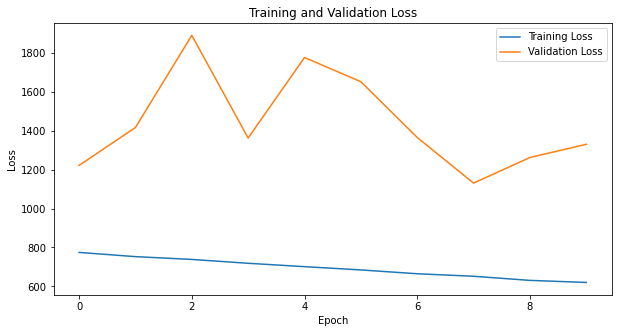

In [105]:
# Plot training loss and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [106]:
dev_loss, dev_accuracy = model.evaluate(dev_x_tens, dev_y_tens)

print(dev_loss)
print(dev_accuracy)
print ("---------")
train_loss, train_accuracy = model.evaluate(train_x_tens, train_y_tens)
print(train_loss)
print(train_accuracy)

736/736 [==============================] - 0s 643us/step - loss: 1329.9979 - count_around_range: 0.3644
1329.9979248046875
0.3644276559352875
---------
7960/7960 [==============================] - 5s 653us/step - loss: 1104.5559 - count_around_range: 0.3907
1104.555908203125
0.39068928360939026


#### Getting Sep overs Dev Test

In [107]:
thres_overs = 15

mask = (dev_data_x['Over'] > thres_overs).to_numpy()
dev_x = dev_data_x.to_numpy()
dev_y = dev_data_y.to_numpy()

prediction_x = tf.convert_to_tensor(dev_x[mask])
prediction_y = tf.convert_to_tensor(dev_y[mask])
print(prediction_x.shape)
print(prediction_y.shape)

(3910, 447)
(3910, 1)


In [108]:
prediction_loss, prediction_accuracy = model.evaluate(prediction_x, prediction_y)
prediction_accuracy

123/123 [==============================] - 0s 691us/step - loss: 831.6024 - count_around_range: 0.4125


0.4125319719314575

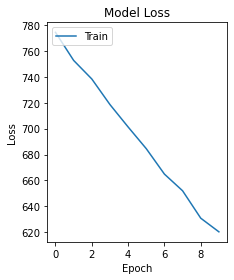

In [109]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()